# Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Import and clean dataset

In [3]:
test = pd.read_csv("UKUsedCarDataSet/audi.csv", quotechar='"', skipinitialspace=True)


X = test.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1) 
Y = test.price

print(test)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


# Most selling year of used cars

In [6]:
stats.mode(test.year) #Most sold year

C:\Users\rb22\AppData\Local\Temp\ipykernel_4932\89213180.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(test.year) #Most sold year


ModeResult(mode=array([2019], dtype=int64), count=array([3197]))

# Seaborn heatmap to show data relation

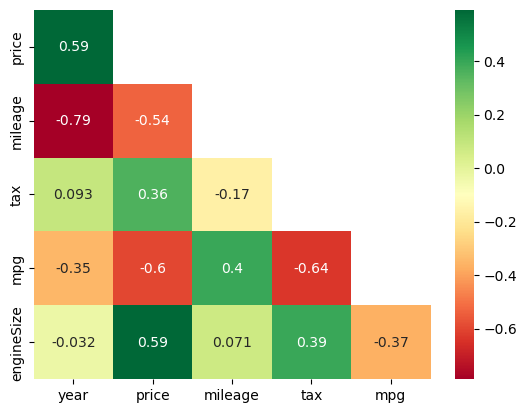

In [7]:
corr = test.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
ax1 = sns.heatmap(corr, mask=mask, annot=True, cmap="RdYlGn")

# Scatter graph showing relation between Price, Mileage and year sold

Text(0, 0.5, 'Selling Price')

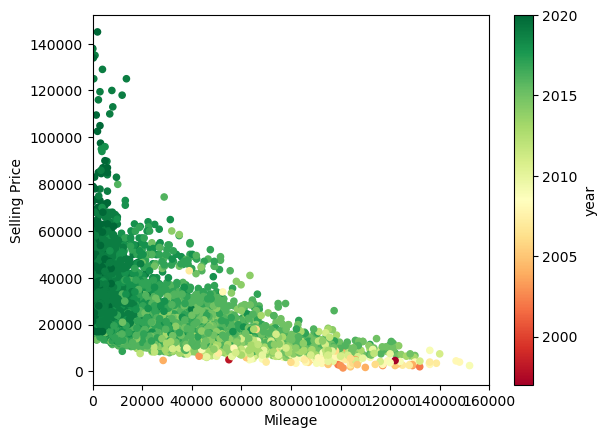

In [8]:
test.plot(kind = 'scatter', x = 'mileage', y = 'price', c='year', colormap='RdYlGn', sharex=False)
plt.xlim(0,160000)
plt.xlabel("Mileage")
plt.ylabel("Selling Price")

In [9]:
# Create a plotting function
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):

    """ Returns multiple histograms as subplots
    """
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution')
            ax.tick_params(axis='x')
            ax.tick_params(axis='y')
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

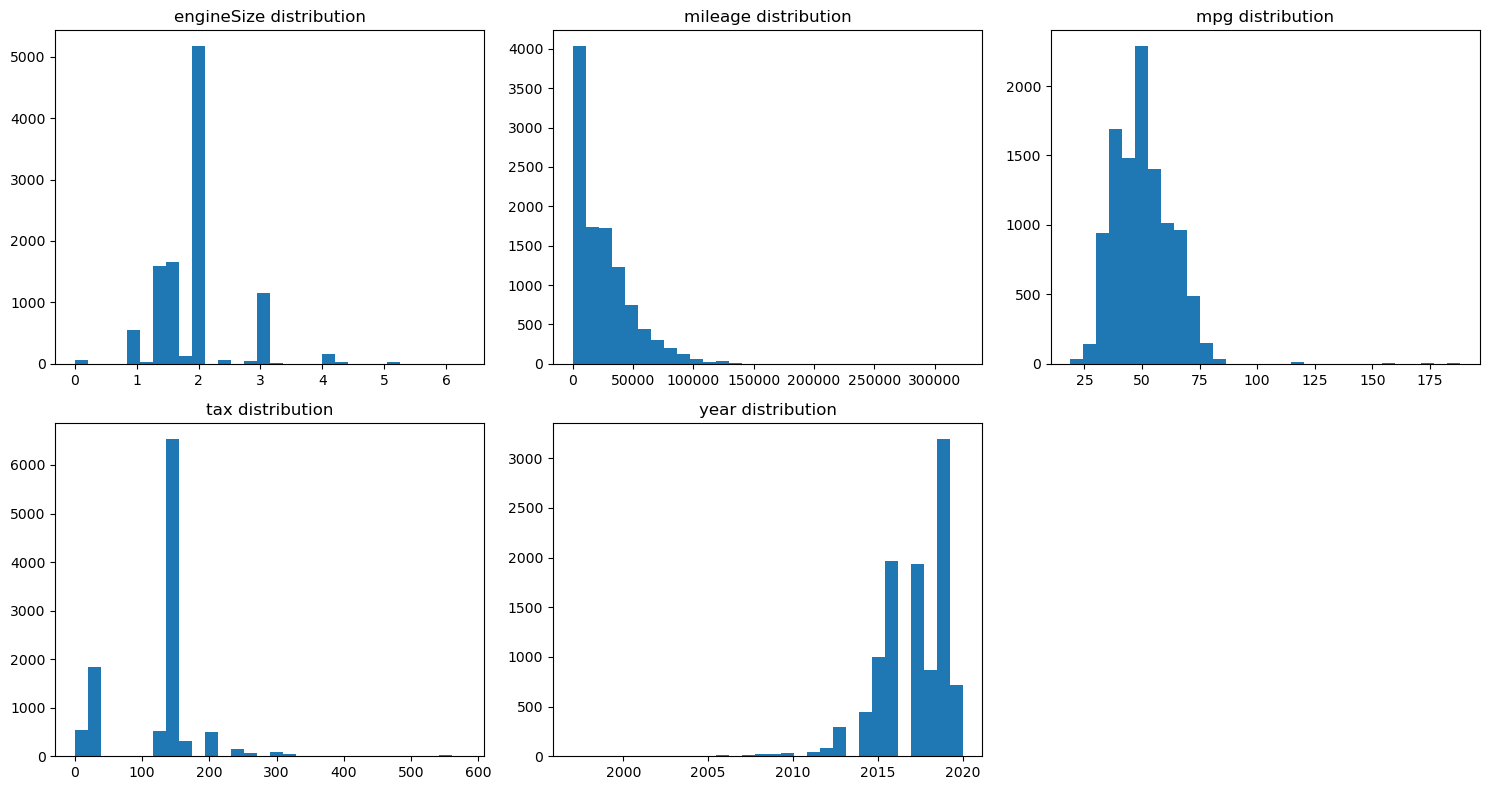

In [19]:
num_mask = (X.dtypes == np.float64) | (X.dtypes == np.int64)
num_cols = X.columns[num_mask].tolist()
hist_loop(data=X[num_cols],
          rows=2,
          cols=3,
          figsize=(15,8))
#https://www.kaggle.com/code/thanhhuynh/linear-regression-and-regularization-ford

# Price Distribution

C:\Users\rb22\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

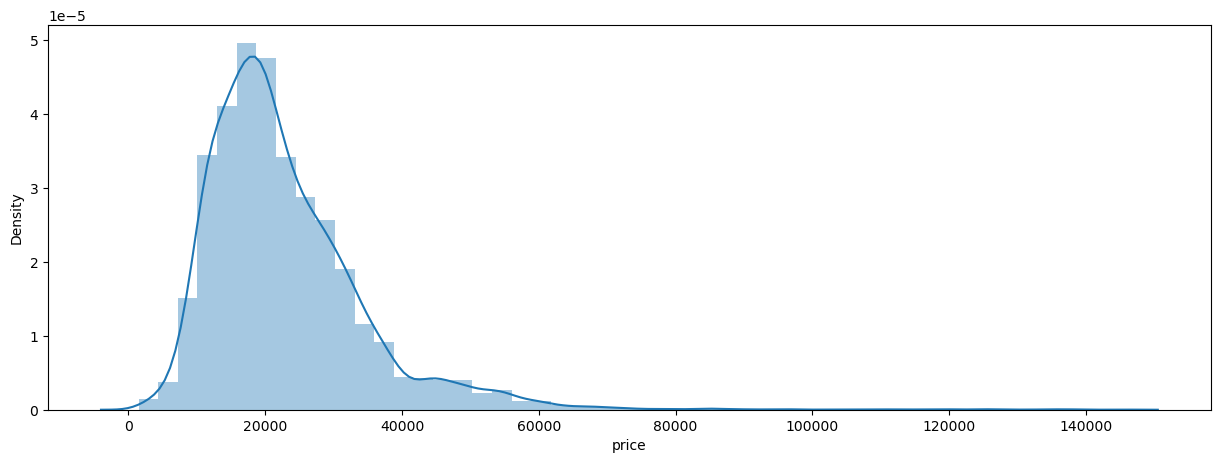

In [21]:
plt.figure(figsize=(15,5))
sns.distplot(test['price'])

# Mileage Distribution

C:\Users\rb22\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

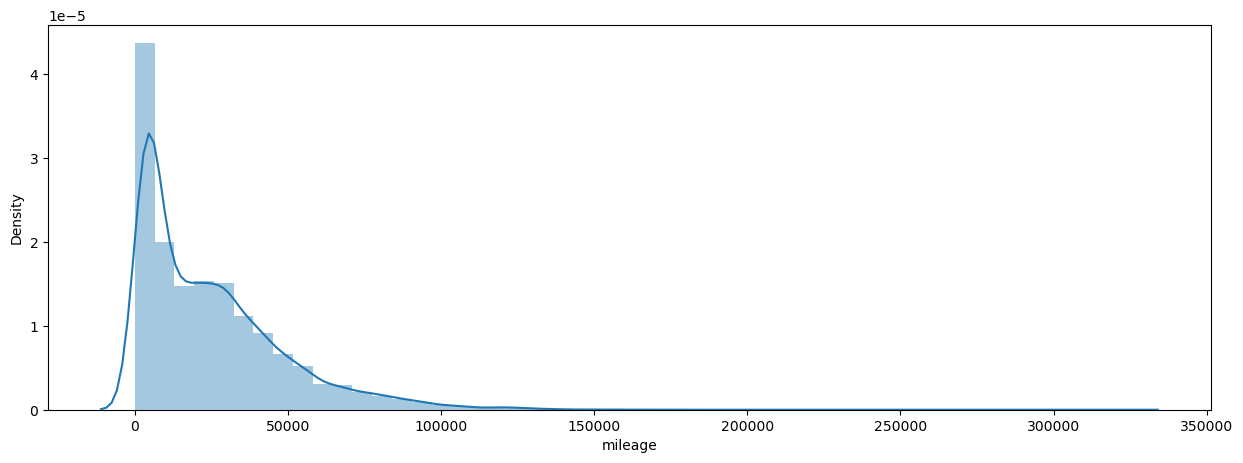

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(test['mileage'])

<AxesSubplot:xlabel='year', ylabel='price'>

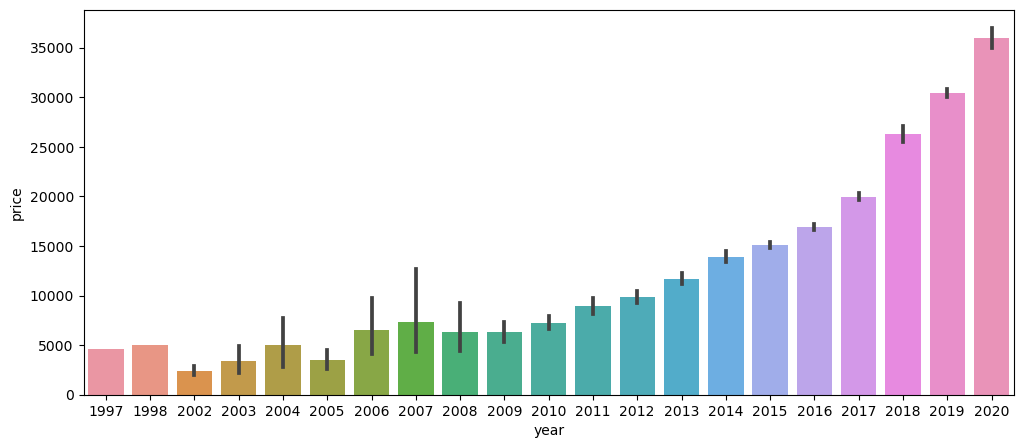

In [5]:
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(x = 'year', y = 'price', data = test)